In [1]:
# Importing the necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import pickle
import sys
from pathlib import Path
import os

# Add the project root directory to Python path
project_root = str(Path.cwd().parent) if 'notebooks' in str(Path.cwd()) else str(Path.cwd())
if project_root not in sys.path:
    sys.path.append(project_root)

from src.model import (
    load_and_preprocess_data,
    prepare_features,
    plot_visuals,
    train_model,
    save_model,
    verify_balance,
    evaluate_model
)


In [2]:
# Load and preprocess data
ins = load_and_preprocess_data(r"C:\Users\ELITEBOOK\OneDrive\Desktop\Projects\Insurance-Predictive-Model-1\data\insurance.csv")
ins.head(5)

,age,sex,bmi,children,smoker,charges
0,19,1,27.900,0,1,16884.92400
1,18,0,33.770,1,0,1725.55230
2,28,0,33.000,3,0,4449.46200
3,33,0,22.705,0,0,21984.47061
4,32,0,28.880,0,0,3866.85520


In [3]:
# Prepare features
# Prepare features with verification
X, y = prepare_features(ins, increase_factor=10)
verify_balance(X, y, ins)

# Print the shapes to confirm increase
print("\nOriginal shape:", ins.shape)
print("Final X shape:", X.shape)
print("Final y shape:", y.shape)


Starting data preparation with increase factor: 10
Initial dataset shape: (1338, 6)

Original dataset shape: (1338, 6)

Initial distribution:

sex distribution:
 sex
0    676
1    662
Name: count, dtype: int64

smoker distribution:
 smoker
0    1064
1     274
Name: count, dtype: int64

Balancing smoker to 1064 samples per category
After balancing smoker: smoker
0    1064
1    1064
Name: count, dtype: int64

Final balanced dataset shape: (2336, 6)

Final distribution:

sex distribution:
 sex
0    1168
1    1168
Name: count, dtype: int64

smoker distribution:
 smoker
1    1242
0    1094
Name: count, dtype: int64

Shape after balancing:
X shape: (2336, 5)
y shape: (2336,)

Final shapes:
X shape: (23360, 5)
y shape: (23360,)

Original vs Final distributions:

Smoker distribution:
Original: smoker
0    0.795217
1    0.204783
Name: proportion, dtype: float64
Final: smoker
 0.938529    0.531678
-1.065497    0.468322
Name: proportion, dtype: float64

Sex distribution:
Original: sex
0    0.505

In [11]:
lowest_charges = ins['charges'].min()
print(f"The lowest charges figure is: {lowest_charges}")

average_charges = ins['charges'].mean()
print(f"The average charges figure is: {average_charges}")

highest_charges = ins['charges'].max()
print(f"The highest charges figure is: {highest_charges}")

num_rows = X.shape[0]
print(f"Number of rows: {num_rows}")


The lowest charges figure is: 1121.8739
The average charges figure is: 13270.422265141257
The highest charges figure is: 63770.42801
Number of rows: 23360


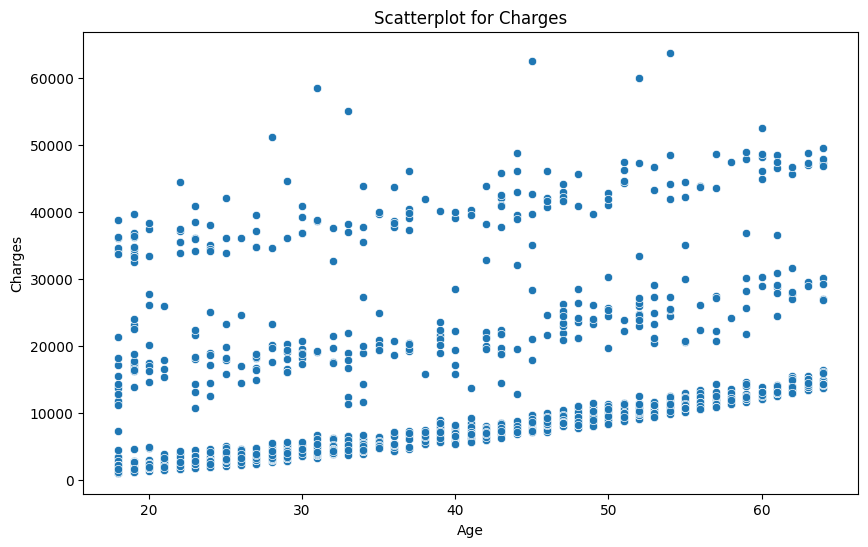

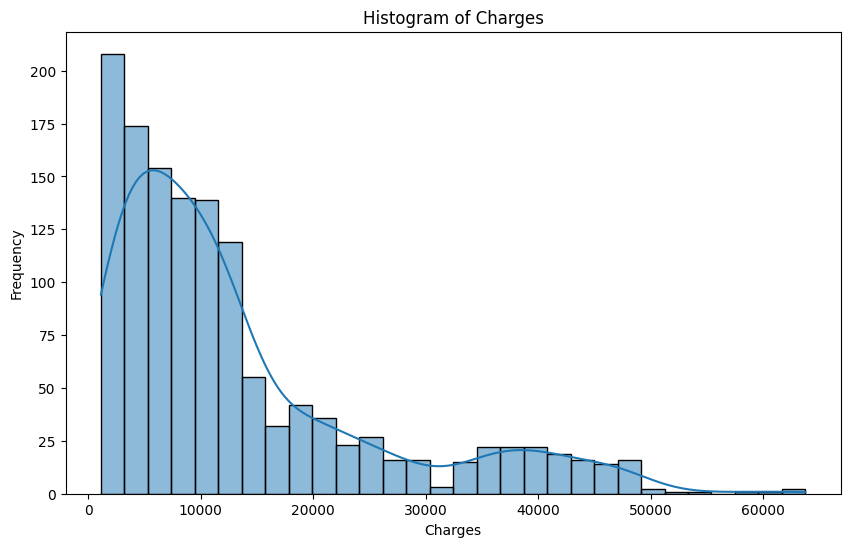

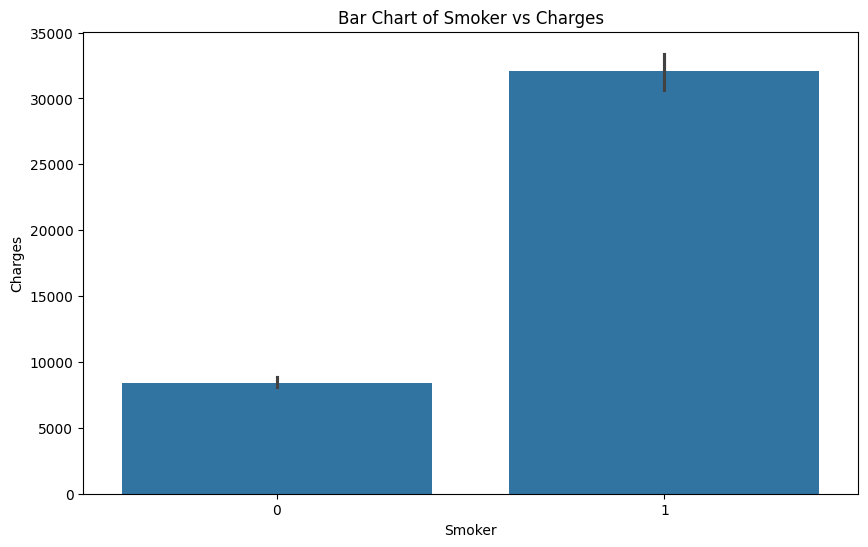

In [5]:
# Create scatter plot
plot_visuals(ins)


In [6]:
# Train the model
model, x_test, y_test = train_model(X, y)
print("Input data shapes:")
print("X shape:", X.shape)
print("y shape:", y.shape)


Starting model training...
Input data shapes:
X shape: (23360, 5)
y shape: (23360,)

After train-test split:
Training set shape: (18688, 5)
Test set shape: (4672, 5)

Using reduced parameter grid for large dataset

Using 3-fold cross validation
Parameter grid: {'model__n_estimators': [100, 200], 'model__max_depth': [None, 30], 'model__min_samples_split': [5, 10], 'model__min_samples_leaf': [2]}
Fitting 3 folds for each of 8 candidates, totalling 24 fits

Best parameters: {'model__max_depth': None, 'model__min_samples_leaf': 2, 'model__min_samples_split': 5, 'model__n_estimators': 200}
Mean CV MAE: 599.5188104009266
Input data shapes:
X shape: (23360, 5)
y shape: (23360,)


In [7]:
# Evaluate the model
predictions, mae, mape = evaluate_model(model, x_test, y_test)
print(f"Mean Absolute Error: {mae}")
print(f"Mean Absolute Percentage Error: {mape}%")

Mean Absolute Error: 387.6519903039611
Mean Absolute Percentage Error: 4.939953379496704%


In [9]:
# Save the model
save_model(model, 'ins_model.pkl')